In [2]:
import torch
from torch import nn, optim
from torchsummary import summary
import torchvision
import numpy as np
import torchvision.transforms as T
import matplotlib.pyplot as plt
import os
from torch.utils.tensorboard import SummaryWriter
from torch.utils import tensorboard
from torchvision.models import resnet18
import zipfile
import glob
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import random

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [ ]:
torch.cuda.empty_cache()

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))

Device: cuda:0


In [4]:
print(torch.cuda.device_count())

1


In [5]:
augs = T.Compose([
    T.RandomRotation(degrees = 20),
    T.Resize((224,224)),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

test_augs=  T.Compose([
    T.Resize((224,224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

In [6]:
img_files = os.listdir('data/train/train')

def train_path(p):
    return f"data/train/train/{p}"

img_files = list(map(train_path, img_files))
random.shuffle(img_files)

train = img_files[:20000]
val = img_files[20000:]

for i in range(100):
    print(train[i])

class CatDogDataset(Dataset):
    def __init__(self, image_paths, transform):
        super().__init__()
        self.paths = image_paths
        self.len = len(self.paths)
        self.transform = transform

    def __len__(self):
        return self.len

    def __getitem__(self, index):
        path = self.paths[index]
        image = Image.open(path).convert('RGB')
        image = self.transform(image)
        label = 0 if 'cat' in path else 1
        return (image, label)

data/train/train/dog.2158.jpg
data/train/train/dog.1552.jpg
data/train/train/dog.2137.jpg
data/train/train/dog.10932.jpg
data/train/train/cat.1671.jpg
data/train/train/dog.3827.jpg
data/train/train/dog.6192.jpg
data/train/train/dog.936.jpg
data/train/train/cat.10123.jpg
data/train/train/cat.8835.jpg
data/train/train/dog.6291.jpg
data/train/train/dog.8577.jpg
data/train/train/cat.11070.jpg
data/train/train/cat.1915.jpg
data/train/train/cat.7101.jpg
data/train/train/cat.5848.jpg
data/train/train/cat.5315.jpg
data/train/train/cat.11173.jpg
data/train/train/dog.10195.jpg
data/train/train/cat.10558.jpg
data/train/train/dog.10651.jpg
data/train/train/cat.4776.jpg
data/train/train/cat.12190.jpg
data/train/train/cat.10551.jpg
data/train/train/cat.9251.jpg
data/train/train/cat.8489.jpg
data/train/train/cat.8537.jpg
data/train/train/dog.7157.jpg
data/train/train/dog.10064.jpg
data/train/train/cat.7975.jpg
data/train/train/dog.9270.jpg
data/train/train/dog.6603.jpg
data/train/train/cat.4697.jpg
d

In [7]:
train_data = CatDogDataset(train, augs)
val_data = CatDogDataset(val, test_augs)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle = True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(0)
tensor(0)


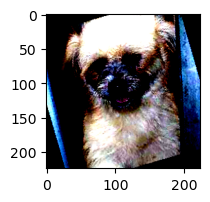

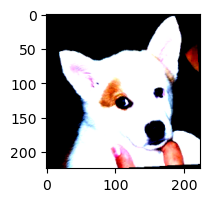

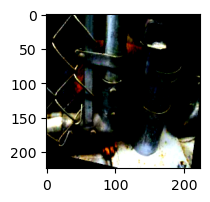

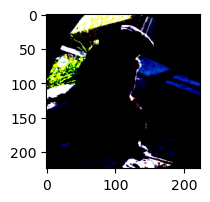

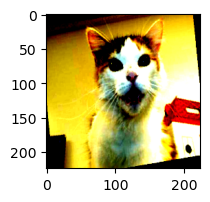

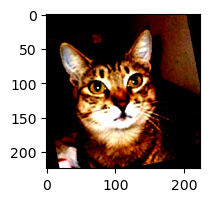

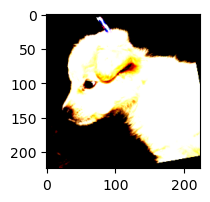

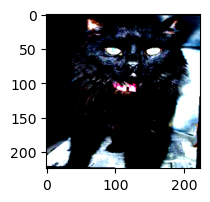

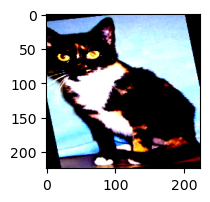

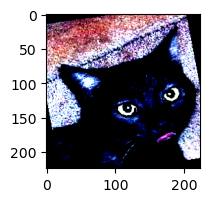

In [8]:
def imshow(img):
    plt.figure(figsize=(2,2))
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))

dataiter = iter(train_loader)
images, labels = next(dataiter)

for i in range(10):
    print(labels[i])
    imshow(torchvision.utils.make_grid(images[i]))

In [9]:
def MobileNet(num_classes=2):
    model = torchvision.models.mobilenet_v2(weights = 'IMAGENET1K_V1')
    model.fc = nn.Sequential(
        nn.LazyLinear(num_classes),
        nn.Softmax(-1)
    )
    return model
model = MobileNet()
model.to(device)
summary(model, (3,224,224))

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to C:\Users\duyan/.cache\torch\hub\checkpoints\mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:03<00:00, 4.10MB/s]
C:\Users\duyan\anaconda3\Lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]               0
           Conv2d-13           [-1, 96, 56, 56]             864
      BatchNorm2d-14           [-1, 96,

In [10]:
optimizer = optim.SGD(model.parameters(), momentum = 0.9, lr = 0.0001, weight_decay=1e-5)
loss_func = nn.CrossEntropyLoss(reduction = 'mean')
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience = 4,verbose = True, min_lr = 0.00001)
num_epochs = 200

In [11]:
train_acc_list = []
val_acc_list = []

train_loss_list = []
val_loss_list = []

es_count = 0 # Patience for LR scheduler
curr_epoch = 0
curr_loss = 0
best_test_acc = 0
best_epoch = 0

for epoch in range(num_epochs):
    curr_epoch = epoch
    if es_count == 15:
        print("Stop training")
        break
    model.train()
    train_loss = 0
    train_acc = 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        accuracy = (torch.max(outputs, dim=-1, keepdim=True)[1].flatten() == labels).sum() / len(labels)
        train_acc += accuracy.item()

    train_acc /= len(train_loader)
    train_loss /= len(train_loader)
    train_acc_list.append(train_acc)
    train_loss_list.append(train_loss)

    model.eval()

    val_acc = 0
    val_loss = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = loss_func(outputs, labels)
            val_loss += loss.item()
            accuracy = (torch.max(outputs, dim=-1, keepdim=True)[1].flatten() == labels).sum() / len(labels)
            val_acc += accuracy.item()

        val_acc /= len(val_loader)
        val_loss /= len(val_loader)
        val_acc_list.append(val_acc)
        val_loss_list.append(val_loss)

        if val_acc > best_test_acc:
            best_epoch = epoch
            best_test_acc = val_acc
            torch.save(model.state_dict(), "best_mobilenet.pth")

    scheduler.step(val_loss)

    if abs(val_loss - curr_loss) < 0.005 or val_loss > curr_loss:
        es_count += 1
        curr_loss = val_loss
    else:
        es_count = 0
        curr_loss = val_loss

    print(f"Epoch {epoch + 1}/{num_epochs} - Training Acc: {train_acc:.4f} - Validation Acc: {val_acc:.4f}")


Epoch 1/200 - Training Acc: 0.8322 - Validation Acc: 0.9682
Epoch 2/200 - Training Acc: 0.9718 - Validation Acc: 0.9759
Epoch 3/200 - Training Acc: 0.9754 - Validation Acc: 0.9792
Epoch 4/200 - Training Acc: 0.9780 - Validation Acc: 0.9800
Epoch 5/200 - Training Acc: 0.9791 - Validation Acc: 0.9824
Epoch 6/200 - Training Acc: 0.9827 - Validation Acc: 0.9838
Epoch 7/200 - Training Acc: 0.9831 - Validation Acc: 0.9844
Epoch 8/200 - Training Acc: 0.9837 - Validation Acc: 0.9842
Epoch 9/200 - Training Acc: 0.9847 - Validation Acc: 0.9848
Epoch 10/200 - Training Acc: 0.9855 - Validation Acc: 0.9852
Epoch 11/200 - Training Acc: 0.9863 - Validation Acc: 0.9856
Epoch 12/200 - Training Acc: 0.9872 - Validation Acc: 0.9867
Epoch 13/200 - Training Acc: 0.9866 - Validation Acc: 0.9862
Epoch 14/200 - Training Acc: 0.9881 - Validation Acc: 0.9842
Epoch 15/200 - Training Acc: 0.9893 - Validation Acc: 0.9879
Epoch 16/200 - Training Acc: 0.9884 - Validation Acc: 0.9871
Epoch 17/200 - Training Acc: 0.98

In [13]:

train_loss_list = np.array(train_loss_list)
val_loss_list = np.array(val_loss_list)
train_acc_list = np.array(train_acc_list)
val_acc_list = np.array(val_acc_list)

writer = SummaryWriter()

writer.flush()
for i in range(curr_epoch):
    writer.add_scalars('Loss', {'Train': train_loss_list[i], 'Test': val_loss_list[i]}, i)
    writer.add_scalars('Accuracy', {'Train': train_acc_list[i], 'Test': val_acc_list[i]}, i)

writer.close()
